In [2]:
import os
import shutil
import random
import keras
import tensorflow

classes_number = 4

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense 
from tensorflow.keras import Model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

train_path = 'data/Farm_Dataset/train'
valid_path = 'data/Farm_Dataset/valid'
test_path = 'data/Farm_Dataset/test'

# MobileNet expect 224 by 224 images.
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [18]:
mobile = keras.applications.MobileNetV3Small()

In [19]:
mobile.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_6[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_3[0][0]']            
                                16)                                                

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_116 (ReLU)               (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_116[0][0]']              
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_65[0][0]']            
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_124 (ReLU)               (None, 1, 1, 240)    0           ['tf.__operators__.add_98[0][0]']
                                                                                                  
 tf.math.multiply_98 (TFOpLambd  (None, 1, 1, 240)   0           ['re_lu_124[0][0]']              
 a)                                                                                               
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_67[0][0]',            
 /Mul (Multiply)                240)                              'tf.math.multiply_98[0][0]']    
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 expanded_conv_5/project (Conv2  (None, None, None,   9600       ['expanded_conv_5/squeeze_excite/
 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_

 rm (BatchNormalization)        144)                                                              
                                                                                                  
 tf.__operators__.add_105 (TFOp  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 Lambda)                        144)                             m[0][0]']                        
                                                                                                  
 re_lu_131 (ReLU)               (None, None, None,   0           ['tf.__operators__.add_105[0][0]'
                                144)                             ]                                
                                                                                                  
 tf.math.multiply_105 (TFOpLamb  (None, None, None,   0          ['re_lu_131[0][0]']              
 da)                            144)                                                              
          

 da)                            288)                                                              
                                                                                                  
 multiply_74 (Multiply)         (None, None, None,   0           ['expanded_conv_8/expand/BatchNor
                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_108[0][0]']   
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_74[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseCon

                                                                                                  
 tf.__operators__.add_112 (TFOp  (None, None, None,   0          ['expanded_conv_9/depthwise/Batch
 Lambda)                        576)                             Norm[0][0]']                     
                                                                                                  
 re_lu_138 (ReLU)               (None, None, None,   0           ['tf.__operators__.add_112[0][0]'
                                576)                             ]                                
                                                                                                  
 tf.math.multiply_112 (TFOpLamb  (None, None, None,   0          ['re_lu_138[0][0]']              
 da)                            576)                                                              
                                                                                                  
 multiply_

                                                                                                  
 multiply_79 (Multiply)         (None, None, None,   0           ['expanded_conv_10/depthwise/Batc
                                576)                             hNorm[0][0]',                    
                                                                  'tf.math.multiply_115[0][0]']   
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_79[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (C

                                                                                                  
Total params: 2,554,968
Trainable params: 2,542,856
Non-trainable params: 12,112
__________________________________________________________________________________________________


In [20]:
for layer in mobile.layers:
    if layer.name == 'expanded_conv_7/Add':
        output = layer.output
        print("Success!")
        break

model_1 = Model(inputs=mobile.inputs, outputs=output)
model_1.summary()

Success!
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_6[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_3[0][0]']            
                                16)                                                

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_116 (ReLU)               (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_116[0][0]']              
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_65[0][0]']            
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_124 (ReLU)               (None, 1, 1, 240)    0           ['tf.__operators__.add_98[0][0]']
                                                                                                  
 tf.math.multiply_98 (TFOpLambd  (None, 1, 1, 240)   0           ['re_lu_124[0][0]']              
 a)                                                                                               
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_67[0][0]',            
 /Mul (Multiply)                240)                              'tf.math.multiply_98[0][0]']    
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 expanded_conv_5/project (Conv2  (None, None, None,   9600       ['expanded_conv_5/squeeze_excite/
 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_

 rm (BatchNormalization)        144)                                                              
                                                                                                  
 tf.__operators__.add_105 (TFOp  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 Lambda)                        144)                             m[0][0]']                        
                                                                                                  
 re_lu_131 (ReLU)               (None, None, None,   0           ['tf.__operators__.add_105[0][0]'
                                144)                             ]                                
                                                                                                  
 tf.math.multiply_105 (TFOpLamb  (None, None, None,   0          ['re_lu_131[0][0]']              
 da)                            144)                                                              
          

In [22]:
for layer in mobile.layers:
    if layer.name == 'Conv_1':
        input_3 = layer.input
        print("Success!")
        break

        
x = mobile.layers[-2].output
output_3 = Dense(units=classes_number, activation='softmax')(x)
model_3 = Model(inputs=input_3, outputs=output_3)
model_3.summary()

Success!
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 96)]                                                             
                                                                                                  
 Conv_1 (Conv2D)                (None, None, None,   55296       ['input_7[0][0]']                
                                576)                                                              
                                                                                                  
 Conv_1/BatchNorm (BatchNormali  (None, None, None,   2304       ['Conv_1[1][0]']                 
 zation)                        576)                                               

In [24]:
from MobileNetCode import _inverted_res_block_dilation

se_ratio = 0.25
activation = hard_swish
kernel = 5
alpha = 1

def depth(d):
    return _depth(d * alpha)

combined_input = model_1.layers[0].input
x = model_1(combined_input)
x = _inverted_res_block(x, 6, depth(48), kernel, 1, se_ratio, activation, 8)
x = _inverted_res_block(x, 6, depth(48), kernel, 1, se_ratio, activation, 9)
x = _inverted_res_block(x, 6, depth(96), kernel, 1, se_ratio, activation, 10)
output_3 = model_3(x)

model = Model(inputs=mobile.input, outputs=output_3)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 model_5 (Functional)           (None, None, None,   195144      ['input_6[0][0]']                
                                48)                                                               
                                                                                                  
 expanded_conv_8/expand (Conv2D  (None, None, None,   13824      ['model_5[1][0]']                
 )                              288)                                                        

 )                              288)                                                              
                                                                                                  
 expanded_conv_9/expand/BatchNo  (None, None, None,   1152       ['expanded_conv_9/expand[0][0]'] 
 rm (BatchNormalization)        288)                                                              
                                                                                                  
 tf.__operators__.add_131 (TFOp  (None, None, None,   0          ['expanded_conv_9/expand/BatchNor
 Lambda)                        288)                             m[0][0]']                        
                                                                                                  
 re_lu_157 (ReLU)               (None, None, None,   0           ['tf.__operators__.add_131[0][0]'
                                288)                             ]                                
          

                                                                                                  
 tf.math.multiply_134 (TFOpLamb  (None, None, None,   0          ['re_lu_160[0][0]']              
 da)                            288)                                                              
                                                                                                  
 multiply_92 (Multiply)         (None, None, None,   0           ['expanded_conv_10/expand/BatchNo
                                288)                             rm[0][0]',                       
                                                                  'tf.math.multiply_134[0][0]']   
                                                                                                  
 expanded_conv_10/depthwise (De  (None, None, None,   7200       ['multiply_92[0][0]']            
 pthwiseConv2D)                 288)                                                              
          

In [25]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import keras.losses

prediction = EarlyStopping(
    monitor="val_accuracy", patience=50, restore_best_weights=True
)
history = model.fit(
    x=train_batches, 
    validation_data=valid_batches, 
    epochs=500, 
    verbose=2,
    callbacks=[prediction]
)

Epoch 1/500
100/100 - 80s - loss: 0.3791 - accuracy: 0.8440 - val_loss: 1.9761 - val_accuracy: 0.2500 - 80s/epoch - 797ms/step
Epoch 2/500
100/100 - 43s - loss: 0.0826 - accuracy: 0.9730 - val_loss: 1.9461 - val_accuracy: 0.2500 - 43s/epoch - 433ms/step
Epoch 3/500
100/100 - 76s - loss: 0.0217 - accuracy: 0.9920 - val_loss: 1.9481 - val_accuracy: 0.2500 - 76s/epoch - 758ms/step
Epoch 4/500
100/100 - 67s - loss: 0.0102 - accuracy: 0.9970 - val_loss: 2.3254 - val_accuracy: 0.2500 - 67s/epoch - 673ms/step
Epoch 5/500
100/100 - 66s - loss: 0.0193 - accuracy: 0.9930 - val_loss: 2.7994 - val_accuracy: 0.2500 - 66s/epoch - 658ms/step
Epoch 6/500
100/100 - 62s - loss: 0.0685 - accuracy: 0.9850 - val_loss: 2.7320 - val_accuracy: 0.2500 - 62s/epoch - 617ms/step
Epoch 7/500
100/100 - 62s - loss: 0.0216 - accuracy: 0.9950 - val_loss: 2.7796 - val_accuracy: 0.2500 - 62s/epoch - 624ms/step
Epoch 8/500
100/100 - 52s - loss: 0.0297 - accuracy: 0.9920 - val_loss: 3.2278 - val_accuracy: 0.2500 - 52s/epo

Epoch 65/500
100/100 - 48s - loss: 2.1135e-04 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9950 - 48s/epoch - 480ms/step
Epoch 66/500
100/100 - 47s - loss: 0.1119 - accuracy: 0.9870 - val_loss: 1.3933 - val_accuracy: 0.8037 - 47s/epoch - 473ms/step
Epoch 67/500
100/100 - 51s - loss: 0.0147 - accuracy: 0.9980 - val_loss: 3.4420 - val_accuracy: 0.6825 - 51s/epoch - 507ms/step
Epoch 68/500
100/100 - 49s - loss: 0.0259 - accuracy: 0.9980 - val_loss: 0.3880 - val_accuracy: 0.9162 - 49s/epoch - 485ms/step
Epoch 69/500
100/100 - 46s - loss: 1.0093e-04 - accuracy: 1.0000 - val_loss: 0.1666 - val_accuracy: 0.9675 - 46s/epoch - 460ms/step
Epoch 70/500
100/100 - 50s - loss: 3.8503e-06 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9787 - 50s/epoch - 503ms/step
Epoch 71/500
100/100 - 75s - loss: 0.0158 - accuracy: 0.9970 - val_loss: 0.0642 - val_accuracy: 0.9812 - 75s/epoch - 753ms/step
Epoch 72/500
100/100 - 47s - loss: 0.0281 - accuracy: 0.9980 - val_loss: 1.5413 - val_accura

Epoch 128/500
100/100 - 45s - loss: 0.0054 - accuracy: 0.9970 - val_loss: 5.1014 - val_accuracy: 0.8750 - 45s/epoch - 448ms/step
Epoch 129/500
100/100 - 62s - loss: 1.6784e-07 - accuracy: 1.0000 - val_loss: 2.1075 - val_accuracy: 0.9112 - 62s/epoch - 616ms/step
Epoch 130/500
100/100 - 77s - loss: 0.0063 - accuracy: 0.9990 - val_loss: 5.1074 - val_accuracy: 0.7188 - 77s/epoch - 767ms/step
Epoch 131/500
100/100 - 73s - loss: 0.0142 - accuracy: 0.9980 - val_loss: 5.0014 - val_accuracy: 0.7575 - 73s/epoch - 729ms/step
Epoch 132/500
100/100 - 77s - loss: 0.0151 - accuracy: 0.9960 - val_loss: 8.7188 - val_accuracy: 0.7400 - 77s/epoch - 770ms/step
Epoch 133/500
100/100 - 74s - loss: 0.0439 - accuracy: 0.9950 - val_loss: 0.0132 - val_accuracy: 0.9987 - 74s/epoch - 736ms/step
Epoch 134/500
100/100 - 55s - loss: 0.0123 - accuracy: 0.9970 - val_loss: 0.3159 - val_accuracy: 0.9775 - 55s/epoch - 552ms/step
Epoch 135/500
100/100 - 43s - loss: 9.3893e-07 - accuracy: 1.0000 - val_loss: 0.1532 - val_ac

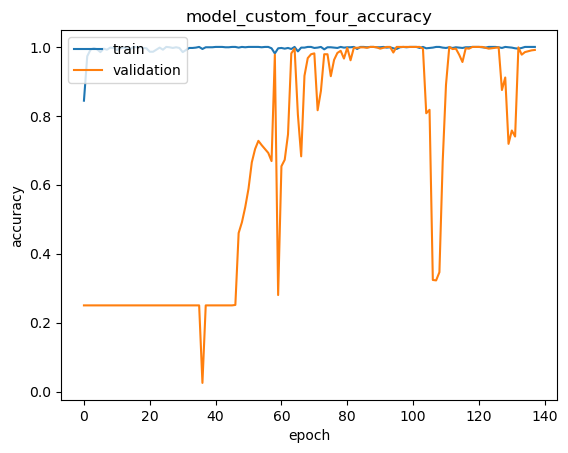

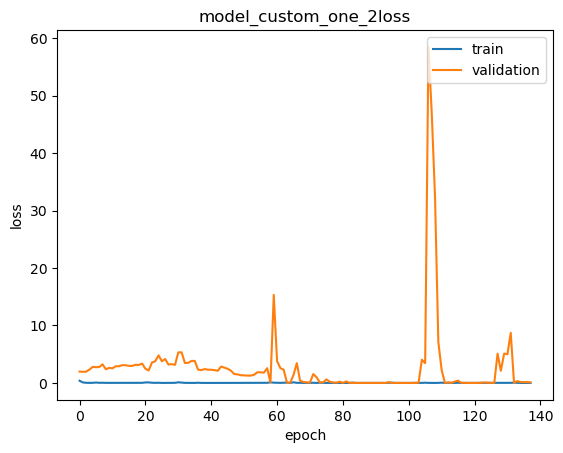

INFO:tensorflow:Assets written to: Trained_Mobile_Custom_Four_Model\assets


INFO:tensorflow:Assets written to: Trained_Mobile_Custom_Four_Model\assets


In [27]:
def plot_all(history):
    """
    The plot_all() function takes the history of the trained model
    and create two plots for accuracy and loss of both training and validation.
    The plots are saved as png files

    Args:
        history: The history to use and plot

    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model_custom_four_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig("plot_accuracy_mobile_custom_four.png")
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model_custom_one_2loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig("plot_loss_mobile_custom_four.png")
    plt.show()
    

plot_all(history)
model.save("Trained_Mobile_Custom_Four_Model")

In [28]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [30]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

Confusion matrix, without normalization
[[150   0   0   0]
 [  0 150   0   0]
 [  0   0 150   0]
 [  0   0  21 129]]


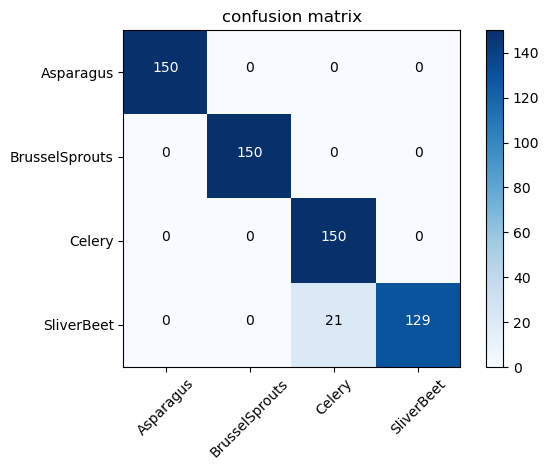

In [31]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.savefig("confusion_mobile_custom_four.png")
    

cm_plot_labels = ['Asparagus', 'BrusselSprouts', 'Celery', 'SliverBeet']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')